使用葡萄酒质量数据集。该数据集包含葡萄酒的各种化学特性，例如酸度、糖分、pH 值和酒精度。它还包含一个质量指标（3-9，越高越好）和一个颜色（红色或白色）。
该文件的名称是 Wine_Quality_Data.csv

In [9]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np

data_path = ['dataset']
filepath = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(filepath, sep=',')#加载数据

In [10]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
y = (data['color'] == 'red').astype(int)#如果是red 编码为1
fields = list(data.columns[:-1])  # 除了 "color"的其他列
correlations = data[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

total_sulfur_dioxide   -0.700357
free_sulfur_dioxide    -0.471644
residual_sugar         -0.348821
citric_acid            -0.187397
quality                -0.119323
alcohol                -0.032970
pH                      0.329129
density                 0.390645
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
dtype: float64

In [12]:
(data['color'] == 'red').astype(int)

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: color, Length: 6497, dtype: int32

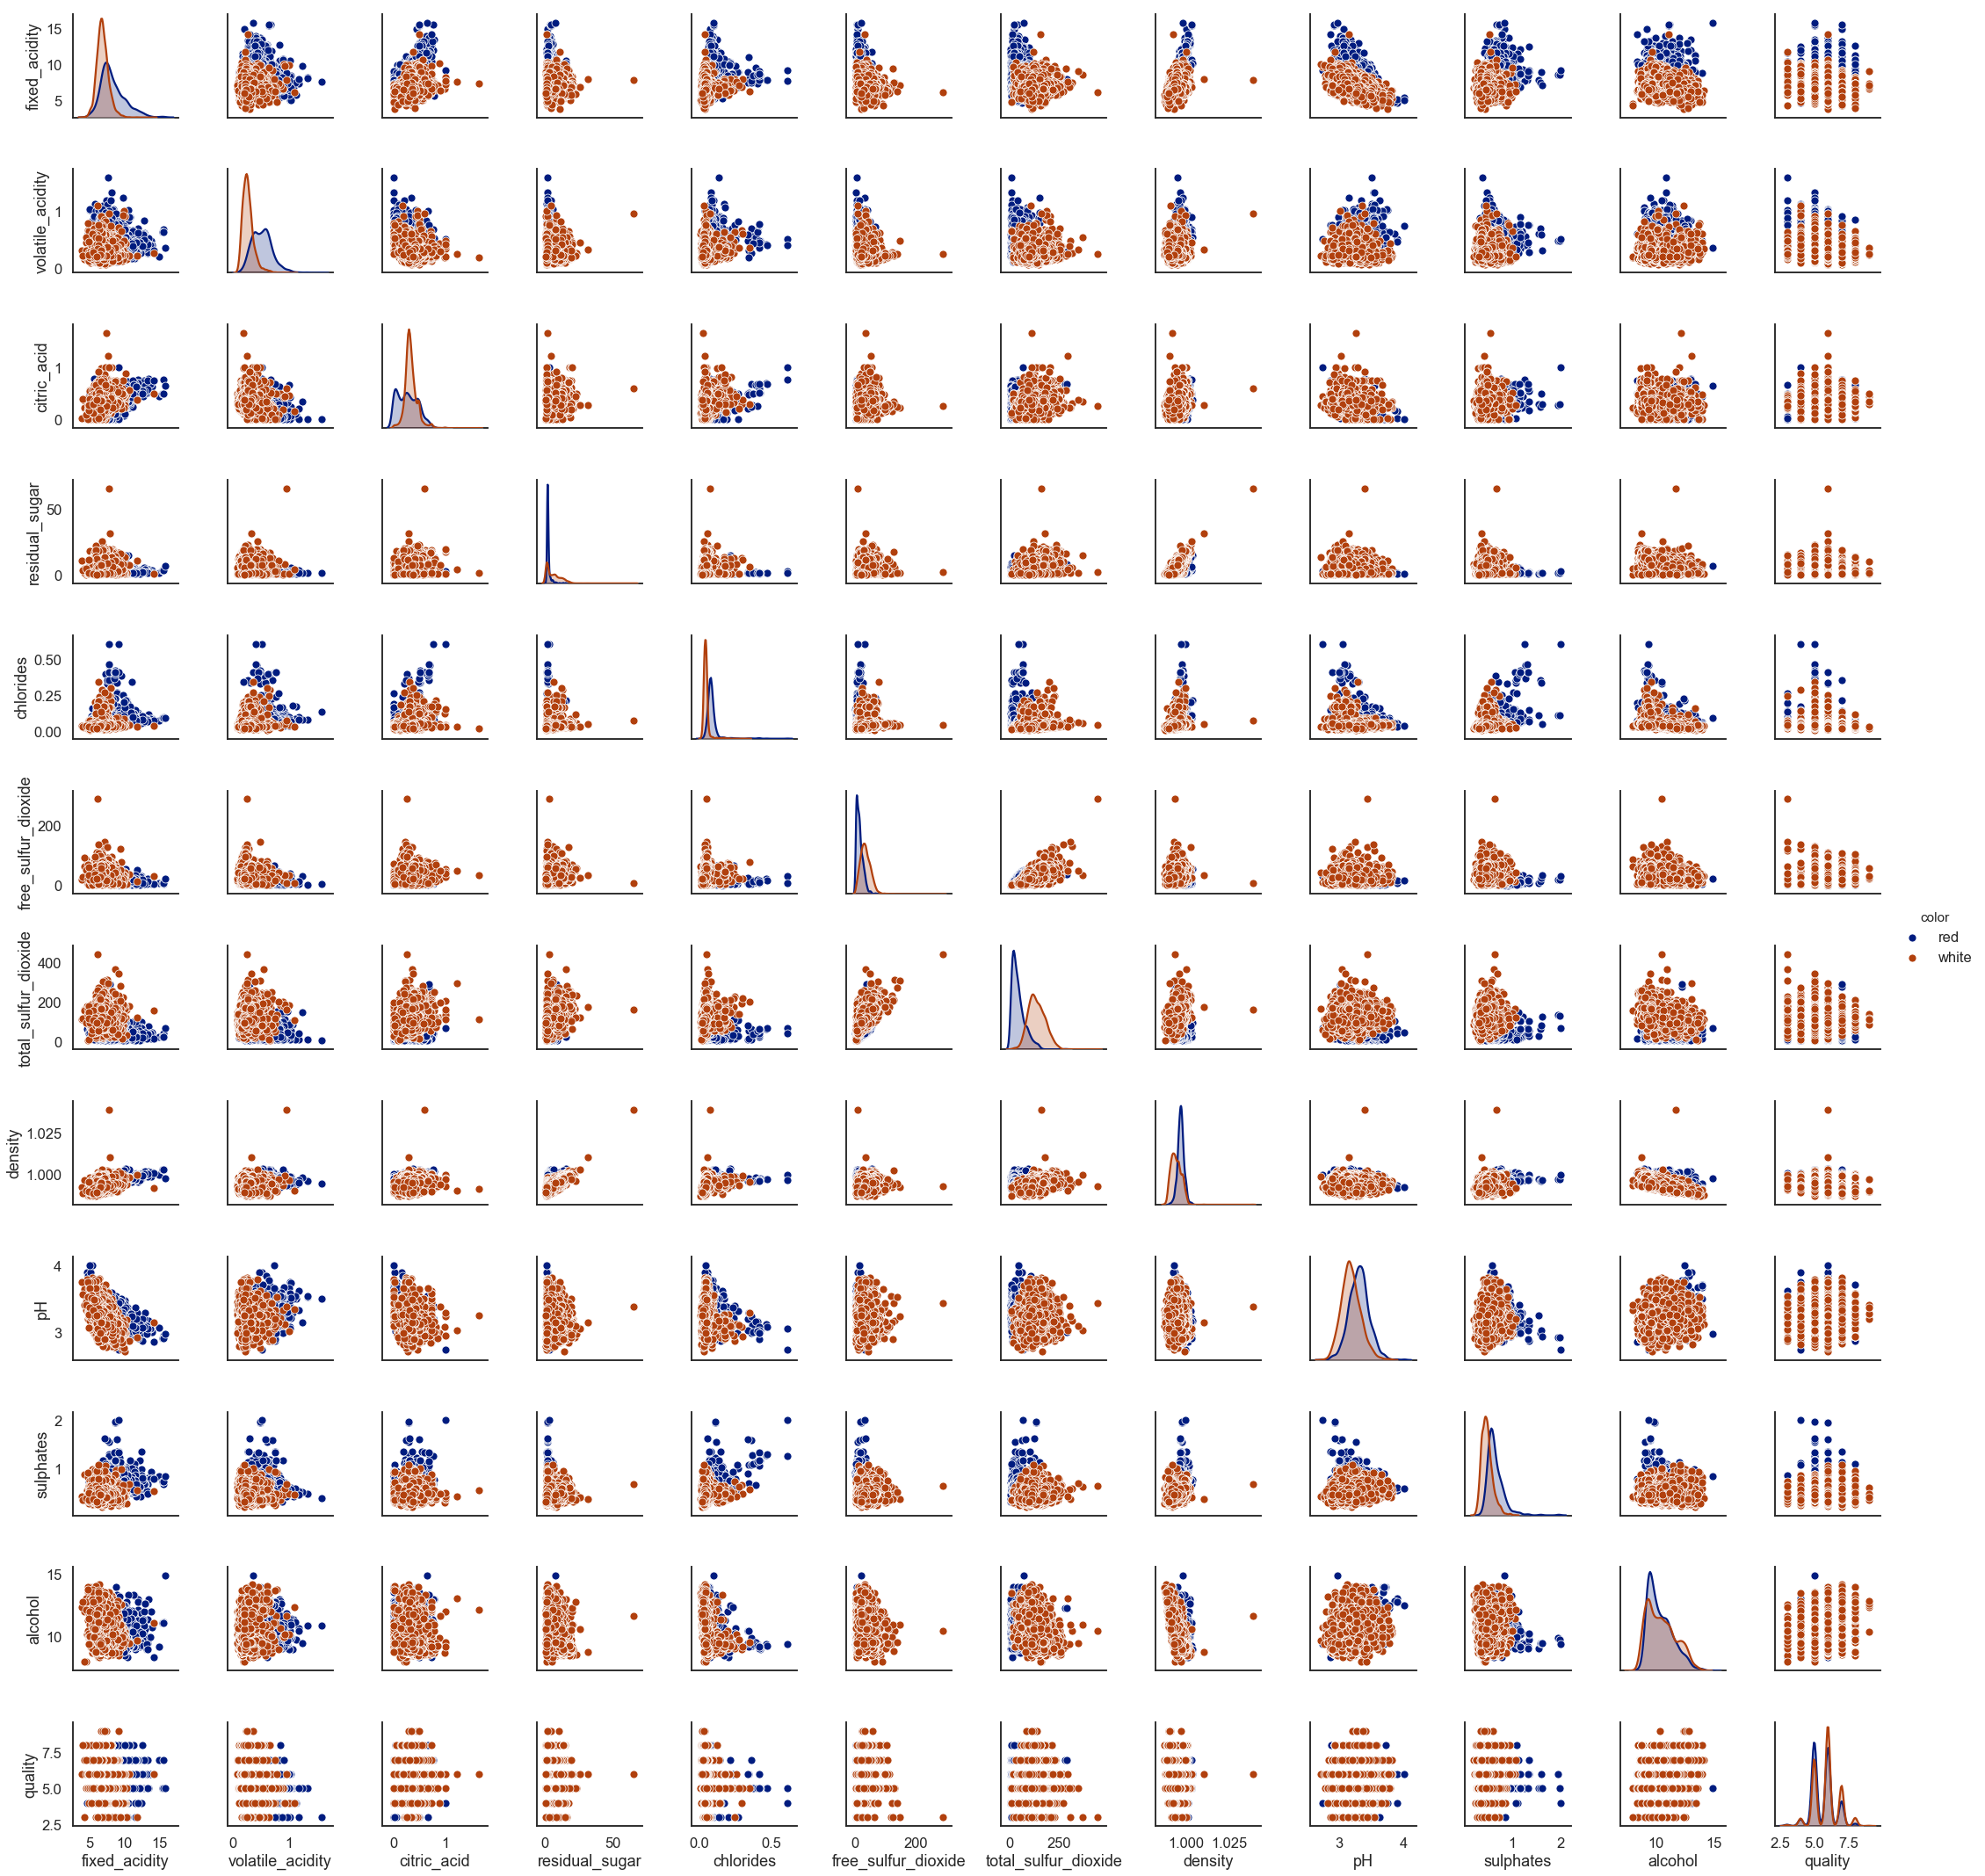

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data, hue='color')

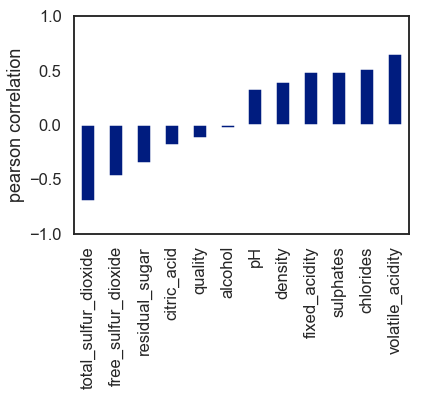

In [14]:
ax = correlations.plot(kind='bar')
ax.set(ylim=[-1, 1], ylabel='pearson correlation');

In [15]:
from sklearn.preprocessing import MinMaxScaler

fields = correlations.map(abs).sort_values().iloc[-2:].index#最相关的两列
print(fields)
X = data[fields]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)#最大最小缩放
X = pd.DataFrame(X, columns=['%s_scaled' % fld for fld in fields])
print(X.columns)

Index(['volatile_acidity', 'total_sulfur_dioxide'], dtype='object')
Index(['volatile_acidity_scaled', 'total_sulfur_dioxide_scaled'], dtype='object')


In [16]:
correlations.map(abs).sort_values()

alcohol                 0.032970
quality                 0.119323
citric_acid             0.187397
pH                      0.329129
residual_sugar          0.348821
density                 0.390645
free_sulfur_dioxide     0.471644
fixed_acidity           0.486740
sulphates               0.487218
chlorides               0.512678
volatile_acidity        0.653036
total_sulfur_dioxide    0.700357
dtype: float64

In [19]:
X

,volatile_acidity_scaled,total_sulfur_dioxide_scaled
0,0.413333,0.064516
1,0.533333,0.140553
2,0.453333,0.110599
3,0.133333,0.124424
4,0.413333,0.064516
...,...,...
6492,0.086667,0.198157
6493,0.160000,0.373272
6494,0.106667,0.241935
6495,0.140000,0.239631


在这个数据集上查看 LinearSVC 分类器的决策边界。

- 将线性支持向量机分类器拟合 X, y。
- 从 X 中选取 300 个样本。获取相应的 y 值，将它们存储在变量 X_color 和 y_color 中。这是因为原始数据集太大，会产生拥挤的图。
- 修改 y_color 使其具有值“red”而不是 1 和值“yellow”而不是 0。
- 散点图 X_color 的列。使用关键字参数“color=y_color”为样本着色。
- 使用下面的代码片段以颜色编码的方式绘制决策表面。

x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)

xx, yy = np.meshgrid(x_axis, y_axis)

xx_ravel = xx.ravel()

yy_ravel = yy.ravel()

X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T

y_grid_predictions = *[YOUR MODEL]*.predict(X_grid)

y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)

尝试为 LinearSVC 选择不同的参数并查看决策边界

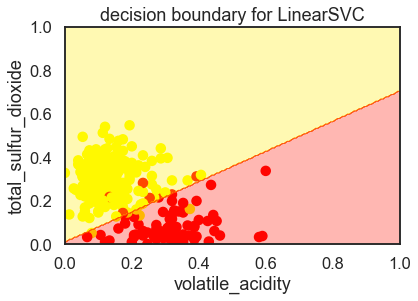

In [20]:
from sklearn.svm import LinearSVC

LSVC = LinearSVC()
LSVC.fit(X, y)

X_color = X.sample(300, random_state=45)
y_color = y.loc[X_color.index]
y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
ax = plt.axes()
ax.scatter(
    X_color.iloc[:, 0], X_color.iloc[:, 1],
    color=y_color, alpha=1)
# -----------
x_axis, y_axis = np.arange(0, 1.005, .005), np.arange(0, 1.005, .005)
xx, yy = np.meshgrid(x_axis, y_axis)
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()
X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
y_grid_predictions = LSVC.predict(X_grid)
y_grid_predictions = y_grid_predictions.reshape(xx.shape)
ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
# -----------
ax.set(
    xlabel=fields[0],
    ylabel=fields[1],
    xlim=[0, 1],
    ylim=[0, 1],
    title='decision boundary for LinearSVC');

拟合一个高斯核 SVC，看看决策边界是如何变化的。

步骤是： 
1. 拟合模型 
2. 从 X 和相应的 y 中获取样本 300 条记录 
3. 创建网格，预测，使用 ax.contourf 绘图 
4. 在散点图上添加 

复制和粘贴代码后，确保完成的函数使用输入estimator而不是你建立的模型。LinearSVC

对于以下 gamma 值，创建高斯核 SVC 并绘制决策边界。 gammas = [.5, 1, 2, 10] 

保持 gamma 常数，对于不同的 C 值，绘制决策边界。

可以试试 Cs = [.1, 1, 10]

In [21]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

核函数可以是以下任意一个：

线性核(linear): 

多项式核(polynomial): , 其中是有参数degree指定, 是由coef0指定。

径向基核rbf: , 其中是有参数gamma指定， 必须大于0。

sigmoid核：， 其中是由参数coef0指定。


参数kernel 能够指定不同的核：

linear_svc = svm.SVC(c='linear')

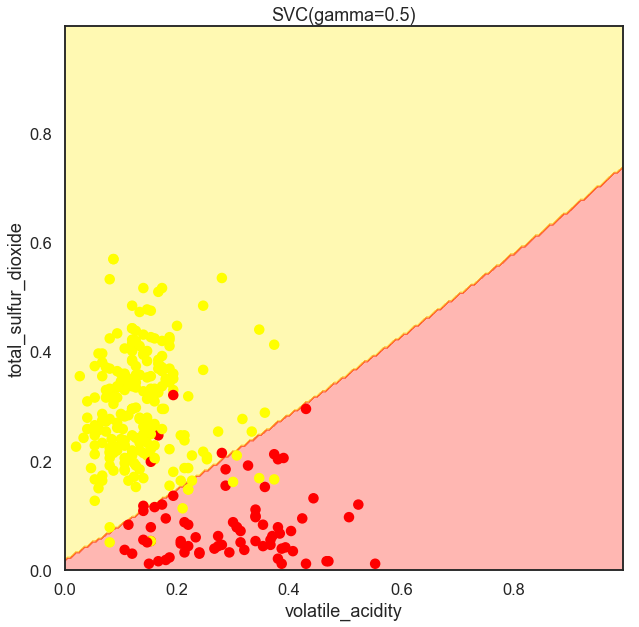

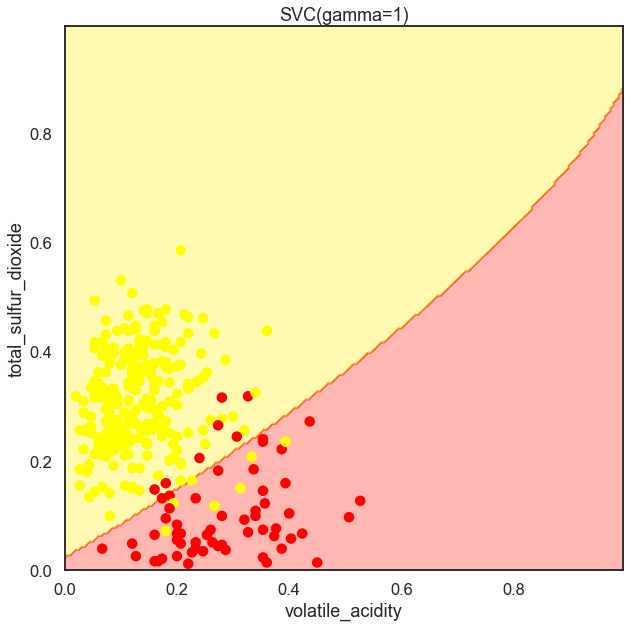

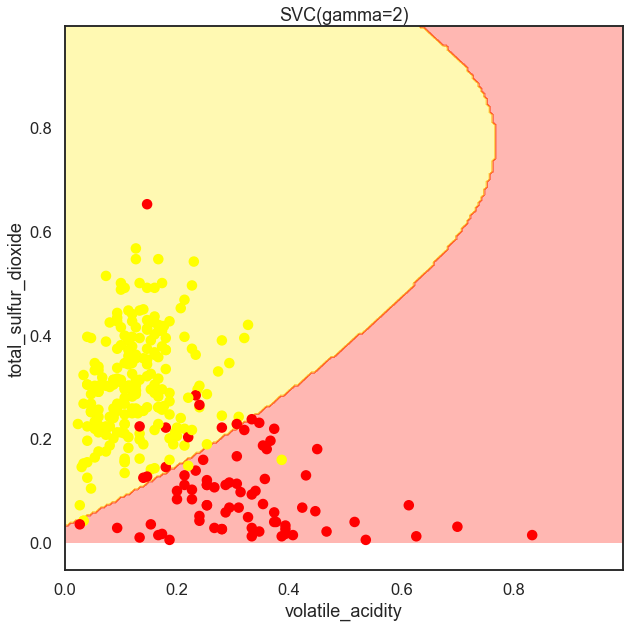

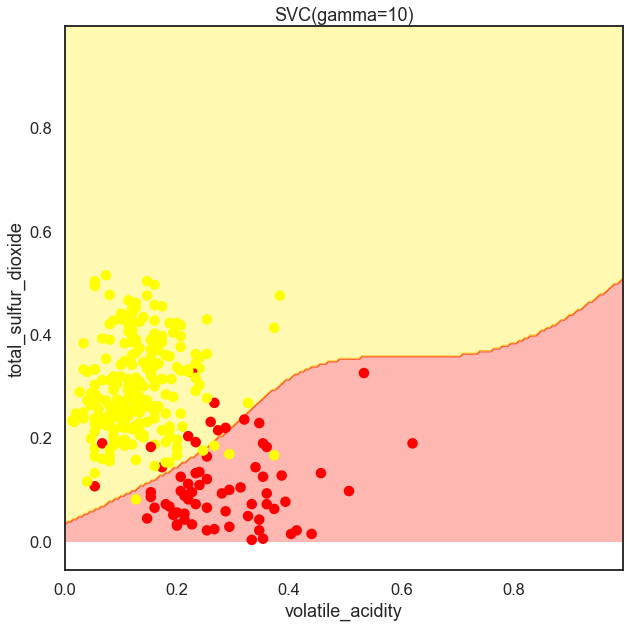

In [22]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

让我们拟合阶数为 3 的多项式核 SVC，看看决策边界如何变化。

- 对于 C 的各种值，绘制决策边界。
- 可以试试Cs = [10,20,100,200]
- 尝试找出给出最佳决策边界的 C 值

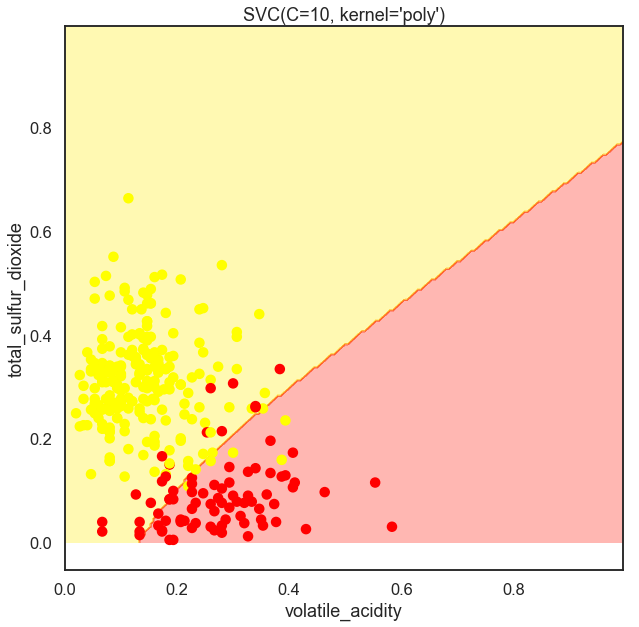

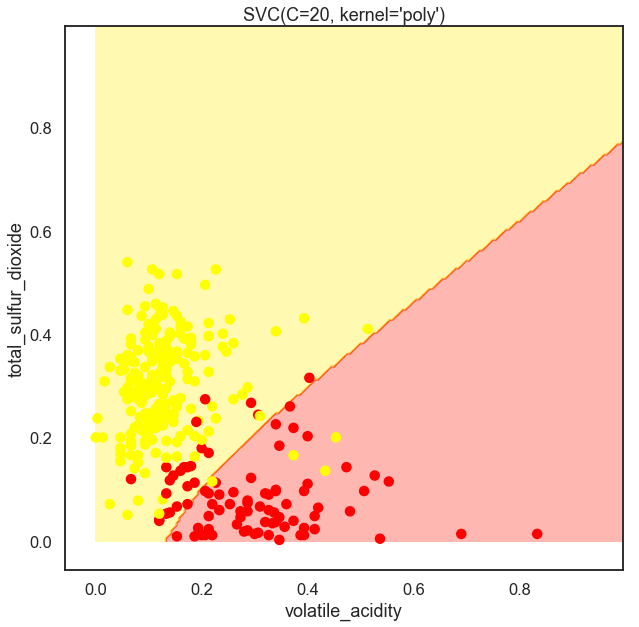

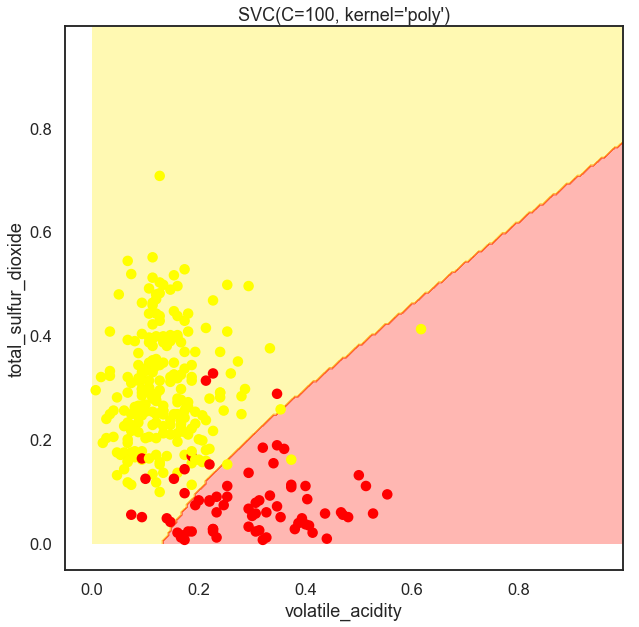

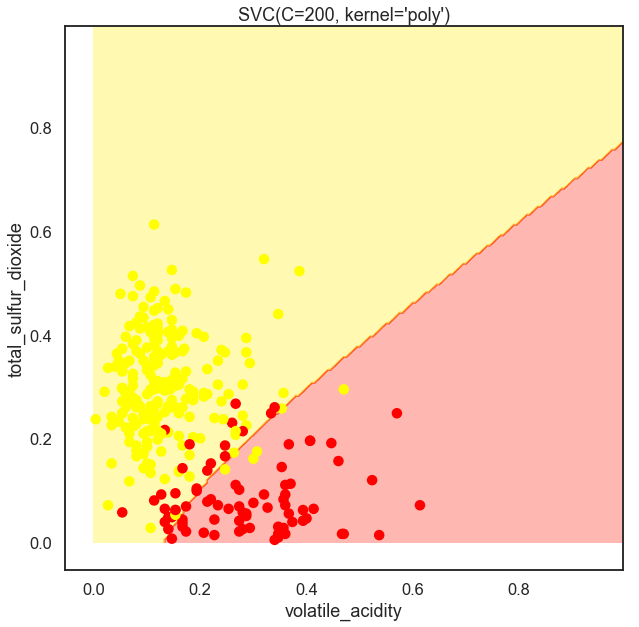

In [32]:
from sklearn.svm import SVC

Cs = [10,20,100,200]
for C in Cs:
    SVC_Polynomial = SVC( C=C,kernel='poly')
    plot_decision_boundary(SVC_Polynomial, X, y)

比较 SVC 与 Nystroem 与 rbf 内核之间的拟合时间。 

Jupyter Notebooks 提供了一个有用的魔法函数 %timeit，它执行一行并打印出适合的时间。
如果在单元格的开头输入 %%timeit ，那么它将运行整个单元格并输出运行时间。

- 如果对原始数据进行了更改，请重新加载葡萄酒质量数据。
- 从 data.color 创建 y，从其余的列创建 X。
- 使用 %%timeit 获取使用 rbf 内核拟合 SVC 的时间。
- 使用 %%timeit 获取以下时间： fit_transform 使用 Nystroem 数据，然后拟合 SGDClassifier。 

Nystroem+SGD 拟合时间更短。如果数据集更大，这种差异将更加明显。

- 制作 5 个 X 副本并将它们连接起来
- 制作 5 个 y 副本并将它们连接起来 
- 比较适应上述两种方法所需的时间

sklearn.kernel_approximation.Nystroem(kernel='rbf', *, gamma=None, coef0=None, degree=None, kernel_params=None, n_components=100, random_state=None, n_jobs=None)

使用训练数据的子集近似内核映射。

使用数据的子集作为基础为任意内核构建近似特征图。

In [34]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()



In [35]:
%%timeit
svc.fit(X, y)

1 loop, best of 5: 454 ms per loop


In [36]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)
#最慢的运行时间比最快的运行时间长 5 倍。这可能意味着正在缓存中间结果。

10 loops, best of 5: 95.1 ms per loop


In [37]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

(32485, 12)
(32485,)


In [38]:
%timeit svc.fit(X2, y2)

1 loop, best of 5: 10.6 s per loop


In [39]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

1 loop, best of 5: 340 ms per loop


In [ ]:
#更多
使用 GridSearchCV调试超参数